In [1]:
%run get_df_retractionwatch.ipynb

data/analysis/df_retracted_retraction_0_100.tsv
68
data/analysis/df_retracted_retraction_100_200.tsv
93
data/analysis/df_retracted_retraction_200_300.tsv
84
data/analysis/df_retracted_retraction_300_400.tsv
127
data/analysis/df_retracted_retraction_400_450.tsv
3


In [2]:
df_articles_citing_retracted_paper.head(4)

,DOI_cited,article_citing
0,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">..."
1,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">..."
2,10.1186/s40478-016-0393-5,"<html>\n <body>\n <article article-type=""rese..."
3,10.1016/j.freeradbiomed.2011.11.027,<html>\n <body>\n <comment>\n S0891-\n </c...


# FIND PAPERS BEFORE AND AFTER RETRACTION, THE RETRACTION NOTE AND THE RETRACTION ITSELF. 
# YOU MAY CONSIDER TO  INTRODUCE A GAP BERORE AND AFTER RETRACTION

In [3]:
from modules import Article_object

list_Articles_citing = []
list_Article_citing_dois = []
list_Article_citing_pmids = []
list_Article_citing_dates = []
list_Article_citing_references = []


for index, row in df_articles_citing_retracted_paper.iterrows():
    print(index)
    
    #for text in row['article_citing']:
    
    Article_citing = Article_object.Article_object()
    Article_citing.text = row['article_citing']

    Article_citing.get_doi_from_text()
    list_Article_citing_dois.append(Article_citing.doi)

    Article_citing.get_pmid_from_text()
    list_Article_citing_pmids.append(Article_citing.pmid)
    
    Article_citing.get_date_from_text()
    list_Article_citing_dates.append(Article_citing.date)

    Article_citing.get_list_references_dois_and_pmids_from_text()
    list_Article_citing_references.append(Article_citing.references_dois)
    
    

    list_Articles_citing.append(Article_citing)


0
1
2
PMID not found
3
DOI not found
Date not found
4
PMID not found
5
DOI not found
Date not found
6
7
8
DOI not found
9
PMID not found
10
PMID not found
11
12
PMID not found
13
Day or month out of range!!!
day:  
         31
         month:  
         11
         year:  
      2010
     
Date set to: 
day:  29 month:  
         11
         year:  
      2010
     
14
PMID not found
15
DOI not found
Date not found
16
17
DOI not found
Date not found
18
PMID not found
19
DOI not found
Date not found
20
21
PMID not found
22
23
DOI not found
Date not found
24
PMID not found
25
DOI not found
Date not found
26
27
28
29
DOI not found
Date not found
30
DOI not found
Date not found
31
32
PMID not found
33
DOI not found
Date not found
34
DOI not found
Date not found
35
DOI not found
Date not found
36
DOI not found
Date not found
37
DOI not found
Date not found
38
DOI not found
Date not found
39
DOI not found
Date not found
40
DOI not found
Date not found
41
DOI not found
Date not found
42
DOI n

In [4]:
df_Articles_citing_retracted_paper = pd.concat([df_articles_citing_retracted_paper.reset_index(drop=True), 
                                    pd.DataFrame({"Article": list_Articles_citing,
                                            "date_article_citing": list_Article_citing_dates,
                                            "doi_article_citing": list_Article_citing_dois,
                                            "pmid_article_citing": list_Article_citing_pmids,
                                            "pmid_article_citing": list_Article_citing_pmids,
                                            "references_in_article_citing": list_Article_citing_references                     
                                            })
                                    ], axis=1)
df_Articles_citing_retracted_paper

# Let's add the date of the retraction
list_date_retracion = []
for  doi in df_Articles_citing_retracted_paper["DOI_cited"]:
    mask = df_retracted_retraction["doi"] == doi
    list_date_retracion.append(datetime.date(df_retracted_retraction[mask]["date_retraction"].iloc[0]))

df_Articles_citing =  pd.concat([df_Articles_citing_retracted_paper,
                                 pd.DataFrame({"date_doi_cited_retraction": list_date_retracion
                                               })
                                ], axis = 1)

In [5]:
df_Articles_citing.shape

(380, 8)

In [6]:
df_Articles_citing.head(5)

,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction
0,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">...",<modules.Article_object.Article_object object ...,1993-08-30,10.1136/ip.2006.015115eoc1,25662882,,2017-12-20
1,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">...",<modules.Article_object.Article_object object ...,1993-08-30,10.1136/ip.2006.015115eoc1,25662882,,2017-12-20
2,10.1186/s40478-016-0393-5,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2016-11-18,10.1186/s40478-016-0393-5,,,2017-12-13
3,10.1016/j.freeradbiomed.2011.11.027,<html>\n <body>\n <comment>\n S0891-\n </c...,<modules.Article_object.Article_object object ...,,,22198263,,2017-11-20
4,10.1128/genomeA.00731-17,"<html>\n <body>\n <article article-type=""brie...",<modules.Article_object.Article_object object ...,2017-08-10,10.1128/genomeA.00731-17,,,2017-11-16


In [7]:
import numpy as np
df_Articles_citing.replace('', np.nan, inplace=True)
df_Articles_citing2 = df_Articles_citing.dropna(subset = ["date_article_citing"])
df_Articles_citing_clean = df_Articles_citing2.reset_index(drop = True)
df_Articles_citing_clean.head(5)

,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction
0,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">...",<modules.Article_object.Article_object object ...,1993-08-30,10.1136/ip.2006.015115eoc1,25662882,NaN,2017-12-20
1,10.1136/ip.2006.015115,"<html>\n <body>\n <pub-id pub-id-type=""pmid"">...",<modules.Article_object.Article_object object ...,1993-08-30,10.1136/ip.2006.015115eoc1,25662882,NaN,2017-12-20
2,10.1186/s40478-016-0393-5,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2016-11-18,10.1186/s40478-016-0393-5,NaN,NaN,2017-12-13
3,10.1128/genomeA.00731-17,"<html>\n <body>\n <article article-type=""brie...",<modules.Article_object.Article_object object ...,2017-08-10,10.1128/genomeA.00731-17,NaN,NaN,2017-11-16
4,10.3892/mmr.2017.7084,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2017-10-25,10.3892/mmr.2017.7084,24663092,NaN,2017-09-28


In [8]:
df_Articles_citing_clean.shape

(206, 8)

In [9]:
list_index_is_the_retracted_paper =[]
list_index_is_the_retraction_note = []
for index, row in df_Articles_citing_clean.iterrows():   
    if row.doi_article_citing in list(df_retracted_retraction["doi"]):
        list_index_is_the_retracted_paper.append(index)
        
    if row.doi_article_citing in list(df_retracted_retraction["doi_retraction"]):
        list_index_is_the_retraction_note.append(index)
        #print(row.DOI_cited)
        #print(row.doi_article_citing)
        #print(index)

df_Articles_citing_no_retractions =  df_Articles_citing_clean.drop(list_index_is_the_retracted_paper + 
                                                                   list_index_is_the_retraction_note)


In [10]:
df_Articles_citing_no_retractions.shape

(142, 8)

In [11]:
list_before_retraction = []
list_after_retraction = []

for index, row in df_Articles_citing_no_retractions.iterrows():
    if row['date_article_citing'] < row['date_doi_cited_retraction']:
        list_before_retraction.append(1)
        list_after_retraction.append(0)
    else:
        list_before_retraction.append(0)
        list_after_retraction.append(1)


df_Articles_before_after_retraction = pd.concat([df_Articles_citing_no_retractions.reset_index(drop = True),
                                                pd.DataFrame({"before_retraction": list_before_retraction,
                                                              "after_retraction": list_after_retraction
                                                             })
                                                ], axis = 1)
        

df_Articles_before_after_retraction.head(5)        


,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction,after_retraction,before_retraction
0,10.1186/s13033-017-0143-5,<html>\n <body>\n <p>\n Int_J_Ment_Health_S...,<modules.Article_object.Article_object object ...,2017-11-30,NaN,28503193,NaN,2017-09-15,1,0
1,10.1002/cbin.10291,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2016-08-16,10.1042/BSR20160174,21980456,NaN,2017-07-24,0,1
2,10.1371/journal.pone.0164571,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2017-06-05,10.3390/ijerph14060602,24800926,NaN,2017-05-26,1,0
3,10.1016/j.cell.2013.04.008,\n <floats-group>\n ...,<modules.Article_object.Article_object object ...,2016-11-16,NaN,23823472,NaN,2017-01-01,0,1
4,10.1016/j.cell.2013.04.008,\n Lipids_Health_Dis/PMC47...,<modules.Article_object.Article_object object ...,2013-03-03,NaN,23623304,NaN,2017-01-01,0,1


In [12]:
len(df_Articles_before_after_retraction["DOI_cited"].unique())

53

# Summary

61 different DOIs of retracted papers cited by
218 articles.

42 retracted papers, 25 retraction notes, and 152 new manuscripts.

152 new manuscripts:
     45 were published after the retraction
    107 before the retraction.

# Let's analyse the text and find the sentence were the paper was cited

In [13]:
df_Articles_before_after_retraction.tail(1)

,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction,after_retraction,before_retraction
141,10.1073/pnas.0501997102,"\n <floats-group>\n <fig id=""ijms-18-...",<modules.Article_object.Article_object object ...,2012-05-04,10.1186/1465-9921-13-36,11401896,NaN,2009-07-09,1,0


In [14]:
df_Articles_before_after_retraction.head(3)

,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction,after_retraction,before_retraction
0,10.1186/s13033-017-0143-5,<html>\n <body>\n <p>\n Int_J_Ment_Health_S...,<modules.Article_object.Article_object object ...,2017-11-30,NaN,28503193,NaN,2017-09-15,1,0
1,10.1002/cbin.10291,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2016-08-16,10.1042/BSR20160174,21980456,NaN,2017-07-24,0,1
2,10.1371/journal.pone.0164571,"<html>\n <body>\n <article article-type=""rese...",<modules.Article_object.Article_object object ...,2017-06-05,10.3390/ijerph14060602,24800926,NaN,2017-05-26,1,0


In [15]:
import imp
import sys
sys.path.insert(0, "./modules")
from modules import get_df_analise_section
#imp.reload()

list_DOI_cited = df_Articles_before_after_retraction.DOI_cited.unique()

df_1sentence = pd.DataFrame() # To get only the sentence citing
df_3sentences = pd.DataFrame() # To get the sentence citing plus the following 3.

df_5sentences = pd.DataFrame()

for index, row in df_Articles_before_after_retraction.iterrows():
    
    df_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing])
    #df_1sentence = df.append(df_analysis_row)
    df_1sentence = df_1sentence.append(df_analysis_row)

    
    df_3_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 3) # We will get 3 additinal sentences
    df_3sentences = df_3sentences.append(df_3_analysis_row)
    
    df_5_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 5) # We will get 3 additinal sentences
    df_5sentences = df_5sentences.append(df_5_analysis_row)
    
    
df_1sentence.reset_index(drop = True)
df_3sentences.reset_index(drop = True)

df_5sentences.reset_index(drop = True)

,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_intro,sentence_citing_maintext
0,10.1186/s13033-017-0143-5,False,False,True,True,DOI not found,False,True,True,True,b1-cpn-15-361,[],[],"[Han and Renshaw\n <xref ref-type=""bibr"" r...","[<xref ref-type=""bibr"" rid=""b1-cpn-15-361""> 1 ..."
1,10.1002/cbin.10291,False,False,False,True,\n 10.1042/BSR20160174\n,False,True,True,True,B49,[],[],[],[* indicates <italic> P </italic> &lt;0.05 for...
2,10.1371/journal.pone.0164571,False,True,False,True,\n 10.3390/ijerph14060602\n,True,True,True,True,B34-ijerph-14-00602,[],[Other factors included the absence of hand wa...,[],[Other factors included the absence of hand wa...
3,10.1016/j.cell.2013.04.008,False,False,True,True,DOI not found,True,True,True,True,B5,[],[],[Overexpression of betatrophin in mice livers ...,[However these inspiring discoveries were late...
4,10.1016/j.cell.2013.04.008,False,False,False,False,DOI not found,True,False,True,True,CR30,[],[],[],[]
5,10.1016/j.cell.2013.04.008,False,True,True,True,\n 10.3892/ijmm.2017...,False,True,True,True,b21-ijmm-39-04-0936,[],"[In the present study, the impact of human ADM...",[The biological characteristics and differenti...,[Its transient overexpression in the liver ind...
6,10.1016/j.cell.2013.04.008,False,False,False,True,DOI not found,False,False,False,True,R1,[],[],[],"[<xref ref-type=""bibr"" rid=""R9""><sup> 9 </sup>..."
7,10.1016/j.cell.2013.04.008,False,True,True,True,\n 10.14740/jocmr3114w\n,False,True,True,True,R04,[],[Because SGLT2 inhibitors decrease insulin lev...,"[</p>\n<p>\n On the other hand, recent cli...","[However, some recent studies show positive as..."
8,10.1016/j.cell.2013.04.008,False,False,True,True,\n 10.1007/s13238-014-0123-3\n,False,False,True,True,CR71,[],[],[Betatrophin is mainly expressed in the liver ...,[Betatrophin is mainly expressed in the liver ...
9,10.1074/jbc.M306295200,False,True,False,False,\n 10.3892/ol.2016.5392\n,False,True,True,True,b32-ol-0-0-5392,[],[The latter is able to boost prostate cancer g...,[],[]


In [16]:
df_1sentence.head(5)

,cited_DOI,cited_in_conclusions,cited_in_discussion,cited_in_introduction,cited_in_maintext,citing_DOI,conclusions_found,discussion_found,introduction_found,maintext_found,reference_number,sentence_citing_conclusions,sentence_citing_discussion,sentence_citing_intro,sentence_citing_maintext
0,10.1186/s13033-017-0143-5,False,False,True,True,DOI not found,False,True,True,True,b1-cpn-15-361,[],[],"[<xref ref-type=""bibr"" rid=""b1-cpn-15-361"">\n ...","[<xref ref-type=""bibr"" rid=""b1-cpn-15-361""> 1)..."
0,10.1002/cbin.10291,False,False,False,True,\n 10.1042/BSR20160174\n,False,True,True,True,B49,[],[],[],[To verify the activation of FOXO1 in our mode...
0,10.1371/journal.pone.0164571,False,True,False,True,\n 10.3390/ijerph14060602\n,True,True,True,True,B34-ijerph-14-00602,[],[Boiling or chlorinating water at the point of...,[],[Boiling or chlorinating water at the point of...
0,10.1016/j.cell.2013.04.008,False,False,True,True,DOI not found,True,True,True,True,B5,[],[],[in a S961-induced insulin resistance mouse mo...,[in a S961-induced insulin resistance mouse mo...
0,10.1016/j.cell.2013.04.008,False,False,False,False,DOI not found,True,False,True,True,CR30,[],[],[],[]


In [17]:
df_1sentence.columns

Index(['cited_DOI', 'cited_in_conclusions', 'cited_in_discussion',
       'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
       'conclusions_found', 'discussion_found', 'introduction_found',
       'maintext_found', 'reference_number', 'sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext'],
      dtype='object')

In [18]:
len(df_1sentence.cited_DOI.unique())

53

In [19]:
len(df_1sentence)

142

df.sentence_citing_discussion.iloc[0]

# Get Dataframe with preprocessed sentences

In [20]:
#for index, row in df.iterrows():
import re
import numpy as np

"""
df_1sentence[['sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext']]
"""

def remove_citations(text):
    number_citations = text.count("[")
    while number_citations > 0:
        init = text.find("[") 
        end = text.find("]") 
        text = text.replace(text[init : end +1 ], " ") # replace the string between two delimiters
        number_citations -= 1
    return text

def remove_html_tags(text):
    to_clean = re.compile('<.*?>')
    clean_text = re.sub(to_clean, '', text)
    return clean_text
    

def get_df_sentences_preprocessed_and_classified(dataframe):
    
    list_all_citing_citing_sentences = []
    
    for index, row in dataframe.iterrows():

        list_sentences_citing_conclusions = row['sentence_citing_conclusions']
        list_sentences_citing_discussion = row['sentence_citing_discussion']
        list_sentences_citing_intro = row['sentence_citing_intro']
        list_sentences_citing_maintext = row['sentence_citing_maintext']

        if list_sentences_citing_conclusions != None:
            sentences_conclusions = " ".join(list_sentences_citing_conclusions)
            sentences_conclusions = remove_html_tags(sentences_conclusions)
            sentences_conclusions = remove_citations(sentences_conclusions)
        else:
            sentences_conclusions = ""

        if list_sentences_citing_discussion != None:
            sentences_discussion = " ".join(list_sentences_citing_discussion)
            sentences_discussion = remove_html_tags(sentences_discussion)
            sentences_discussion = remove_citations(sentences_discussion)

        else:
            sentences_discussion = ""

        if list_sentences_citing_intro != None:
            sentences_intro = " ".join(list_sentences_citing_intro)
            sentences_intro = remove_html_tags(sentences_intro)
            sentences_intro = remove_citations(sentences_intro)

        else:
            sentences_intro = ""

        if list_sentences_citing_maintext != None:
            sentences_maintext = " ".join(list_sentences_citing_maintext)
            sentences_maintext = remove_html_tags(sentences_maintext)
            sentences_maintext = remove_citations(sentences_maintext)
        else:
            sentences_maintext = ""

        all_sentences = (sentences_maintext + " " + 
                         sentences_discussion + " " +
                         sentences_intro + " " +
                         sentences_maintext)
        if all_sentences != "   ":
            list_all_citing_citing_sentences.append(all_sentences)
        else:
            list_all_citing_citing_sentences.append(np.nan)

    #print(all_sentences)

    dataframe_sentences_classification = pd.concat([df_Articles_before_after_retraction[["DOI_cited", 
                                                                                         "doi_article_citing",
                                                                                         #"pmid_article_citing",
                                                                                         "before_retraction",
                                                                                         "after_retraction"]],
                                            pd.DataFrame({"sentences_citing" : list_all_citing_citing_sentences
                                                          })
                                            ], axis = 1)
    return dataframe_sentences_classification

df1sentence_sentences_classification = get_df_sentences_preprocessed_and_classified(df_1sentence)
df3sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_3sentences)

df5sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_5sentences)



In [21]:
##############TEST####################

In [22]:


#for index, row in df.iterrows():
import re
import numpy as np

"""
df_1sentence[['sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext']]
"""

def remove_citations(text):
    number_citations = text.count("[")
    while number_citations > 0:
        init = text.find("[") 
        end = text.find("]") 
        text = text.replace(text[init : end +1 ], " ") # replace the string between two delimiters
        number_citations -= 1
    return text

def remove_html_tags(text):
    to_clean = re.compile('<.*?>')
    clean_text = re.sub(to_clean, '', text)
    return clean_text
    

def get_df_sentences_preprocessed_and_classified(dataframe):
    
    list_all_citing_citing_sentences = []
    
    for index, row in dataframe.iterrows():

        list_sentences_citing_conclusions = row['sentence_citing_conclusions']
        list_sentences_citing_discussion = row['sentence_citing_discussion']
        list_sentences_citing_intro = row['sentence_citing_intro']
        list_sentences_citing_maintext = row['sentence_citing_maintext']

        if list_sentences_citing_conclusions != None:
            sentences_conclusions = " ".join(list_sentences_citing_conclusions)
            sentences_conclusions = remove_html_tags(sentences_conclusions)
            #sentences_conclusions = remove_citations(sentences_conclusions)
        else:
            sentences_conclusions = ""

        if list_sentences_citing_discussion != None:
            sentences_discussion = " ".join(list_sentences_citing_discussion)
            sentences_discussion = remove_html_tags(sentences_discussion)
            #sentences_discussion = remove_citations(sentences_discussion)

        else:
            sentences_discussion = ""

        if list_sentences_citing_intro != None:
            sentences_intro = " ".join(list_sentences_citing_intro)
            sentences_intro = remove_html_tags(sentences_intro)
            #sentences_intro = remove_citations(sentences_intro)

        else:
            sentences_intro = ""

        if list_sentences_citing_maintext != None:
            sentences_maintext = " ".join(list_sentences_citing_maintext)
            sentences_maintext = remove_html_tags(sentences_maintext)
            #sentences_maintext = remove_citations(sentences_maintext)
        else:
            sentences_maintext = ""

        all_sentences = (sentences_maintext + " " + 
                         sentences_discussion + " " +
                         sentences_intro + " " +
                         sentences_maintext)
        if all_sentences != "   ":
            list_all_citing_citing_sentences.append(all_sentences)
        else:
            list_all_citing_citing_sentences.append(np.nan)

    #print(all_sentences)

    dataframe_sentences_classification = pd.concat([df_Articles_before_after_retraction[["DOI_cited", 
                                                                                         "doi_article_citing",
                                                                                         #"pmid_article_citing",
                                                                                         "before_retraction",
                                                                                         "after_retraction"]],
                                            pd.DataFrame({"sentences_citing" : list_all_citing_citing_sentences
                                                          })
                                            ], axis = 1)
    return dataframe_sentences_classification

df1sentence_sentences_classification = get_df_sentences_preprocessed_and_classified(df_1sentence)
df3sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_3sentences)

df5sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_5sentences)





In [23]:
for sentence in df1sentence_sentences_classification.sentences_citing:
    print(sentence)

 1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a s

In [24]:

###############  FIN TEST  #######################

In [25]:
len(df1sentence_sentences_classification)

142

In [26]:
df_Articles_before_after_retraction.head(1)

,DOI_cited,article_citing,Article,date_article_citing,doi_article_citing,pmid_article_citing,references_in_article_citing,date_doi_cited_retraction,after_retraction,before_retraction
0,10.1186/s13033-017-0143-5,<html>\n <body>\n <p>\n Int_J_Ment_Health_S...,<modules.Article_object.Article_object object ...,2017-11-30,NaN,28503193,NaN,2017-09-15,1,0


In [27]:
df1sentence_sentences_classification.tail(3)

,DOI_cited,doi_article_citing,before_retraction,after_retraction,sentences_citing
139,10.1104/pp.011019,10.1186/1472-6882-13-155,0,1,"For example, flavonoids showed antimicrobial a..."
140,10.1073/pnas.0501997102,10.3390/ijms18122636,1,0,Whereas cardiodynamic (heart rate [HR] reducti...
141,10.1073/pnas.0501997102,10.1186/1465-9921-13-36,0,1,Others have reported that changes in occludin ...


In [28]:
#df.dropna(subset = "sentences_citing")

df1sentence_sentences_classification  = df1sentence_sentences_classification.dropna(subset = ["sentences_citing"])

df3sentences_sentences_classification  = df3sentences_sentences_classification.dropna(subset = ["sentences_citing"])


df5sentences_sentences_classification  = df5sentences_sentences_classification.dropna(subset = ["sentences_citing"])

In [29]:
len(df1sentence_sentences_classification.doi_article_citing.unique())

111

In [30]:
df1sentence_sentences_classification.head(3)


,DOI_cited,doi_article_citing,before_retraction,after_retraction,sentences_citing
0,10.1186/s13033-017-0143-5,NaN,0,1,1) Although there has been meaningful debate...
1,10.1002/cbin.10291,10.1042/BSR20160174,1,0,To verify the activation of FOXO1 in our model...
2,10.1371/journal.pone.0164571,10.3390/ijerph14060602,0,1,Boiling or chlorinating water at the point of ...


In [31]:
len(df1sentence_sentences_classification.DOI_cited.unique())

47

# Let's split the dataframe on sentences before and after retraction

In [32]:
df_sentences_before = df1sentence_sentences_classification[df1sentence_sentences_classification["before_retraction"] == 1]
df_sentences_after = df1sentence_sentences_classification[df1sentence_sentences_classification["after_retraction"] == 1]
print("df_sentences_before: ", df_sentences_before.shape)
print("df_sentences_after: ", df_sentences_after.shape)

df_3sentences_before = df3sentences_sentences_classification[df3sentences_sentences_classification["before_retraction"] == 1]
df_3sentences_after = df3sentences_sentences_classification[df3sentences_sentences_classification["after_retraction"] == 1]

df_5sentences_before = df5sentences_sentences_classification[df5sentences_sentences_classification["before_retraction"] == 1]
df_5sentences_after = df5sentences_sentences_classification[df5sentences_sentences_classification["after_retraction"] == 1]


df_sentences_before:  (90, 5)
df_sentences_after:  (32, 5)


In [39]:
len(df_sentences_after.DOI_cited.unique())

24

In [34]:
for sentence in df_sentences_after.sentences_citing:
    print(sentence)

 1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a s

# Let's analyse the documents

* How many the documents from df_sentences_before cite DOIs that are not cited after retraction? 
* How many cite DOIs that are also cited after retraction?

* How many the documents from df_sentences_after cite DOIs that are not cited before retraction? 
* How many cite DOIs that are also cited before retraction?


In [35]:
dois_cited_before = set(df_sentences_before["DOI_cited"])
dois_cited_after = set(df_sentences_after["DOI_cited"])

doi_cited_before_and_after = dois_cited_before.intersection(dois_cited_after)
doi_cited_before_and_after 

doi_cited_only_before = dois_cited_before.difference(dois_cited_after)
doi_cited_only_before

doi_cited_only_after = dois_cited_after.difference(dois_cited_before)
doi_cited_only_after

print("\n unique dois_cited_before ", len(dois_cited_before))
print("\n unique dois_cited_after ", len(dois_cited_after))
print("\n unique doi_cited_before_and_after ", len(doi_cited_before_and_after))
print("\n unqiue doi_cited_only_before ", len(doi_cited_only_before))
print("\n unique doi_cited_only_after ", len(doi_cited_only_after))




 unique dois_cited_before  35

 unique dois_cited_after  24

 unique doi_cited_before_and_after  12

 unqiue doi_cited_only_before  23

 unique doi_cited_only_after  12


In [36]:
print("\n number documents citing after - DOIS that are only cited after: ")
df_sentences_after_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_only_after)]
print(df_sentences_after_only.shape[0])

print("\n number documents citing after - DOIS that are cited before and after:")
df_sentences_after_not_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_after_not_only.shape[0])

print("\n number documents citing before - DOIS that are only cited before: ")
df_sentences_before_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_only_before)]
print(df_sentences_before_only.shape[0])

print("\n number documents citing before - DOIS that are cited before and after:")
df_sentences_before_not_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_before_not_only.shape[0])

########################3

df_3sentences_after_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_3sentences_after_not_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_3sentences_before_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_3sentences_before_not_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_before_and_after)]


#######################

df_5sentences_after_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_5sentences_after_not_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_5sentences_before_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_5sentences_before_not_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_before_and_after)]



 number documents citing after - DOIS that are only cited after: 
15

 number documents citing after - DOIS that are cited before and after:
17

 number documents citing before - DOIS that are only cited before: 
53

 number documents citing before - DOIS that are cited before and after:
37


In [40]:
df_sentences_before.shape

(90, 5)

### Summary 3:

90 documents before retractions:
    
    - 53 documents cite DOIs (23 unique DOIs) that are not cited after retraction.
    - 37 documents cite DOIs (12 unique DOIs) that are also cited after retraction.

    - 83 unique doi_article_citing - len(df_sentences_before.doi_article_citing.unique())
        There are 7 documents without the DOIS_citing     
    - 35 unique DOI_cited - len(df_sentences_before.DOI_cited.unique())
        Of those 23 DOI are only cited before. 12 before and after.


32 documents after retraction:
    
    - 15 documents cite DOIs (12 unique DOIs) that are not cited before retraction.
    - 17 documents cite DOIs (12 unique DOIs) that are also cited before retraction.


    - 29 unique doi_article_citing - len(df_sentences_after.doi_article_citing.unique())
        There are 3 documents without the DOIS_citing        
    - 24 unique DOI_cited - len(df_sentences_after.DOI_cited.unique())
        Of those 12 DOI are only cited after. 12 before and after.
    

We will select documents before retraction only if they also have been cited after retraction.


#####################################################################################

# Summary 2 

61 different DOIs of retracted papers cited by
218 articles.

42 retracted papers, 25 retraction notes, and 152 new manuscripts.

152 new manuscripts:
     45 were published after the retraction
    107 before the retraction.
    
* The algorithm is able to find the text citing in:
    
127 manuscripts:
    36 were published after retraction
    91 were published before retraction


# Selection of documents, stemming and counting of words to train a classifier

In [41]:
import imp
#imp.reload('modules.get_stemmed_sentences_and_list_words')
#import importlib

#import modules.get_stemmed_sentences_and_list_words
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words

#path = "/project/eLife_retractions/modules"
#os.chdir(path)
#importlib.reload("get_stemmed_sentences_and_list_words.py")

from modules.get_stemmed_sentences_and_list_words import *
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)



# 1. With one sentence citing:

# 1.1 -  All documents
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
(documents_all, list_all_words, list_all_bigrams) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)

df_documents_all = df_sentences_before.append(df_sentences_after) # I will used this in unsupervised models



# 1.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50, list_all_words_50_50, list_all_bigrams_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)


# 2. With one sentence citing + following 3 sentences:

# 2.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing

df_documents_all_3sentences = df_3sentences_before.append(df_3sentences_after)
# used for unsupervised training

(documents_all_3sentences, list_all_words_3sentences, list_all_bigrams_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 2.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_3sentences, list_all_words_50_50_3sentences, list_all_bigrams_50_50_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)

  
    


# Note you could use CountVectorizer from sklearn, but I have done this manually in order to 
# filter the words we are adding or not.

from sklearn.feature_extraction.text import CountVectorizer
from random import randint

count_vectorizer = CountVectorizer(
    ngram_range=(2,2))#, max_features=10, max_df=0.6


#i = randint(0, len(df_sentences_before) - 1)
tokenizer = CountVectorizer().build_tokenizer()
tokenizer(df_sentences_before['sentences_citing'].iloc[0])#.iloc[i])



In [42]:
# 3. With one sentence citing + following 5 sentences:

# 3.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing
(documents_all_5sentences, list_all_words_5sentences, list_all_bigrams_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 3.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_5sentences, list_all_words_50_50_5sentences, list_all_bigrams_50_50_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)


In [43]:
print(len(list_all_words),
len(list_all_words_50_50), 
len(list_all_words_3sentences),
len(list_all_words_50_50_3sentences))

10630 6007 32659 16912


In [44]:
len(list_all_words_50_50_5sentences)

23702

# Selection: same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater


In [45]:
# 1.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

# Let's get all the papers from df_sentences_after_only (X), and from df_sentences_after_not_only (Y)
# and X papers from df_sentences_before_only, and Y documents from df_sentences_before_and_after. 
# When selecting the documents for df_sentences_before_and_after we must be sure that we are not selecting 
# all the papers the same doi (for each cited doi, we want to have the number of douments citing before and 
# after)

df_sentences_before_only_selection = df_sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_sentences_before_only_selection = df_sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_sentences_before_only_selection = df_sentences_before_only_selection[:df_sentences_after_only.shape[0]]
df_sentences_before_only_selection

list_doi_added = []
df_sentences_before_not_only_selection = pd.DataFrame()
df_sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_sentences_after_not_only_doi_selected = df_sentences_after_not_only[df_sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_after_not_only =  df_sentences_after_not_only_doi_selected.shape[0]
    
    df_sentences_before_not_only_doi_selected = df_sentences_before_not_only[df_sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_before_not_only = df_sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_sentences_after_not_only <= times_doi_in_df_sentences_before_not_only:
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_after_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_after_not_only])
    else: 
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_before_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_before_not_only])

# The dataframes with the selected documents are:
# df_sentences_before_not_only_selection
# df_sentences_after_not_only_selection
# df_sentences_before_only_selection
# df_sentences_after_only

df_sentences_before_selection = df_sentences_before_only_selection.append(df_sentences_before_not_only_selection)
df_sentences_after_selection = df_sentences_after_only.append(df_sentences_after_not_only_selection)

df_documents_50_50_balanced = df_sentences_before_selection.append(df_sentences_after_selection)
# used for unsupervised


sentences_before = df_sentences_before_selection.sentences_citing
sentences_after = df_sentences_after_selection.sentences_citing
(documents_50_50_balanced, list_all_words_50_50_balanced, list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [46]:
df_sentences_before_not_only_selection.shape

(16, 5)

In [47]:
df_sentences_after_not_only_selection.shape

(16, 5)

In [48]:
df_sentences_before_selection.shape

(31, 5)

In [49]:
df_sentences_after_selection.shape

(31, 5)

In [50]:
len(documents_50_50_balanced)

62

In [51]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_3sentences_before_only_selection = df_3sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_3sentences_before_only_selection = df_3sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_3sentences_before_only_selection = df_3sentences_before_only_selection[:df_3sentences_after_only.shape[0]]
df_3sentences_before_only_selection

list_doi_added = []
df_3sentences_before_not_only_selection = pd.DataFrame()
df_3sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_3sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_3sentences_after_not_only_doi_selected = df_3sentences_after_not_only[df_3sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_after_not_only =  df_3sentences_after_not_only_doi_selected.shape[0]
    
    df_3sentences_before_not_only_doi_selected = df_3sentences_before_not_only[df_3sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_before_not_only = df_3sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_3sentences_after_not_only <= times_doi_in_df_3sentences_before_not_only:
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_after_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_after_not_only])
    else: 
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_before_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_3sentences_before_balanced = df_3sentences_before_only_selection.append(df_3sentences_before_not_only_selection)
df_3sentences_after_balanced = df_3sentences_after_only.append(df_3sentences_after_not_only_selection)

df_documents_50_50_balanced_3sentences = df_3sentences_before_balanced.append(df_3sentences_after_balanced)
# for unsupervised training

sentences_before = df_3sentences_before_balanced.sentences_citing
sentences_after = df_3sentences_after_balanced.sentences_citing
(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [52]:
df_3sentences_before_balanced.shape

(31, 5)

In [53]:
df_3sentences_after_balanced.shape

(31, 5)

In [54]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_5sentences_before_only_selection = df_5sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_5sentences_before_only_selection = df_5sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_5sentences_before_only_selection = df_5sentences_before_only_selection[:df_5sentences_after_only.shape[0]]
df_5sentences_before_only_selection

list_doi_added = []
df_5sentences_before_not_only_selection = pd.DataFrame()
df_5sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_5sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_5sentences_after_not_only_doi_selected = df_5sentences_after_not_only[df_5sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_after_not_only =  df_5sentences_after_not_only_doi_selected.shape[0]
    
    df_5sentences_before_not_only_doi_selected = df_5sentences_before_not_only[df_5sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_before_not_only = df_5sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_5sentences_after_not_only <= times_doi_in_df_5sentences_before_not_only:
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_after_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_after_not_only])
    else: 
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_before_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_5sentences_before_balanced = df_3sentences_before_only_selection.append(df_5sentences_before_not_only_selection)
df_5sentences_after_balanced = df_3sentences_after_only.append(df_5sentences_after_not_only_selection)


sentences_before = df_5sentences_before_balanced.sentences_citing
sentences_after = df_5sentences_after_balanced.sentences_citing
(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [55]:
len(list_all_bigrams)

10509

# SUM UP:


### 1. With one sentence citing:

#### 1.1 -  All documents
* documents_all
* list_all_words
* list_all_bigrams

#### 1.2 -  50 % before - 50% after
* documents_50_50
* list_all_words_50_50
* list_all_bigrams_50_50

#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced
* list_all_words_50_50_balanced
* list_all_bigrams_50_50_balanced 

### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents
* documents_all_3sentences
* list_all_words_3sentences
* list_all_bigrams_3sentences

#### 2.2 -  50 % before - 50% after
* documents_50_50_3sentences
* list_all_words_50_50_3sentences
* list_all_bigrams_50_50_3sentences

#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced_3sentences
* list_all_words_50_50_balanced_3sentences
* list_all_bigrams_50_50_balanced_3sentences
    

# Naive Bayes Algorithm

### Some checkings

In [56]:
print("Number of words in : \n\nlist_all_words: \t", len(list_all_words),
    "\nlist_all_words_50_50: \t", len(list_all_words_50_50), 
    "\nlist_all_words_50_50_balanced: \t", len(list_all_words_50_50_balanced),
    "\n\nlist_all_words_3sentences: \t", len(list_all_words_3sentences),
    "\nlist_all_words_50_50_3sentences: \t", len(list_all_words_50_50_3sentences),
    "\nlist_all_words_50_50_balanced_3sentences: \t", len(list_all_words_50_50_balanced_3sentences)
     )

Number of words in : 

list_all_words: 	 10630 
list_all_words_50_50: 	 6007 
list_all_words_50_50_balanced: 	 5664 

list_all_words_3sentences: 	 32659 
list_all_words_50_50_3sentences: 	 16912 
list_all_words_50_50_balanced_3sentences: 	 18357


### Naive Bayes

In [57]:
import nltk 

def find_features(document, word_features):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

def train_Naive_Bayes(documents, list_all_words, spliting_training_test_ratio = 0.25):
    
    # Word frequencies
    all_words_freq = nltk.FreqDist(list_all_words)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    featuresets = [(find_features(article, word_features), cat) for (article, cat) in documents]

    # set that we'll train our classifier with                    
    test_size = round(spliting_training_test_ratio * len(featuresets))
    print("documents in test_set: \t", test_size)
    print("documents in training_set: \t", len(featuresets) -test_size)
    
    training_set = featuresets[test_size:]

    # set that we'll test against.
    testing_set = featuresets[:test_size]

    classifier = nltk.NaiveBayesClassifier.train(training_set)
    print("\nClassifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
    
    classifier.show_most_informative_features(100)
    
    return classifier
    
    

                         
                         
"""
list_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) 
all_words_50_50_features = list(list_all_words_50_50_freq.keys())

list_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)
all_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)

list_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)

list_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)

list_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)
"""

'\nlist_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) \nall_words_50_50_features = list(list_all_words_50_50_freq.keys())\n\nlist_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)\nall_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)\n\nlist_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)\n\nlist_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)\n\nlist_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)\n'

In [58]:
### 1. With one sentence citing:

#### 1.1 -  All documents

train_Naive_Bayes(documents_all, list_all_words, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 70.83333333333334
Most Informative Features
                   serum = True            after : before =      8.1 : 1.0
                    caus = True            after : before =      6.3 : 1.0
                  glucos = True            after : before =      6.3 : 1.0
                  branch = True            after : before =      4.5 : 1.0
                   novel = True            after : before =      4.5 : 1.0
                 upregul = True            after : before =      4.5 : 1.0
               pulmonari = True            after : before =      4.5 : 1.0
                     due = True            after : before =      4.5 : 1.0
                  analyz = True            after : before =      4.5 : 1.0
                  surviv = True            after : before =      4.5 : 1.0
                  remain = True            after : before =      4.5 : 1.0
                  articl = True          

In [59]:
train_Naive_Bayes(documents_all, list_all_bigrams, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 75.0
Most Informative Features
      ('bond', 'member') = False           after : before =      1.0 : 1.0
     ('contest', 'find') = False           after : before =      1.0 : 1.0
       ('infect', 'pcr') = False           after : before =      1.0 : 1.0
  ('intrigu', 'problem') = False           after : before =      1.0 : 1.0
    ('insulin', 'level') = False           after : before =      1.0 : 1.0
    ('manner', 'differ') = False           after : before =      1.0 : 1.0
    ('recent', 'effort') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
     ('env', 'glycogag') = False           after : before =      1.0 : 1.0
       ('vitro', 'hand') = False           after : before =      1.0 : 1.0
  ('protein', 'consist') = False           after : before =      1.0 : 1.0
('antibacteri', 'antifung') = False           after : 

In [60]:
#### 1.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50, list_all_words_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 100.0
Most Informative Features
                   mirna = True           before : after  =      6.0 : 1.0
                     use = True            after : before =      5.2 : 1.0
                     mir = True           before : after  =      4.4 : 1.0
                prolifer = True           before : after  =      4.4 : 1.0
                   human = True           before : after  =      3.6 : 1.0
                    gene = True           before : after  =      3.1 : 1.0
                    mous = True           before : after  =      2.8 : 1.0
                     act = True           before : after  =      2.8 : 1.0
                    role = True           before : after  =      2.8 : 1.0
                     thi = True           before : after  =      2.8 : 1.0
                   shown = True           before : after  =      2.6 : 1.0
                   activ = True            after : be

In [61]:
train_Naive_Bayes(documents_50_50, list_all_bigrams_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 30.76923076923077
Most Informative Features
  ('intrigu', 'problem') = False          before : after  =      1.0 : 1.0
    ('insulin', 'level') = False          before : after  =      1.0 : 1.0
    ('recent', 'effort') = False          before : after  =      1.0 : 1.0
       ('approv', 'fda') = False          before : after  =      1.0 : 1.0
       ('vitro', 'hand') = False          before : after  =      1.0 : 1.0
     ('exchang', 'acyl') = False          before : after  =      1.0 : 1.0
    ('cavin', 'patient') = False          before : after  =      1.0 : 1.0
     ('apoptosi', 'mir') = False          before : after  =      1.0 : 1.0
         ('base', 'dna') = False          before : after  =      1.0 : 1.0
     ('express', 'lost') = False          before : after  =      1.0 : 1.0
     ('variou', 'human') = False          before : after  =      1.0 : 1.0
('suppli', 'glucosephosph') = False      

In [62]:
#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced, list_all_words_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 66.66666666666666
Most Informative Features
                  follow = True            after : before =      6.8 : 1.0
                   known = True            after : before =      6.8 : 1.0
             overexpress = True            after : before =      4.5 : 1.0
                  effect = True            after : before =      4.2 : 1.0
                receptor = True            after : before =      3.9 : 1.0
                   liver = True            after : before =      3.5 : 1.0
             betatrophin = True            after : before =      3.5 : 1.0
                  glucos = True            after : before =      3.5 : 1.0
                    gene = True           before : after  =      3.4 : 1.0
                  recent = True            after : before =      3.2 : 1.0
                     not = True            after : before =      3.2 : 1.0
                   howev = True          

In [63]:
train_Naive_Bayes(documents_50_50_balanced, list_all_bigrams_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 41.66666666666667
Most Informative Features
  ('intrigu', 'problem') = False           after : before =      1.0 : 1.0
        ('level', 'usp') = False           after : before =      1.0 : 1.0
       ('usp', 'appear') = False           after : before =      1.0 : 1.0
       ('the', 'observ') = False           after : before =      1.0 : 1.0
    ('insulin', 'level') = False           after : before =      1.0 : 1.0
          ('neg', 'the') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
       ('confus', 'new') = False           after : before =      1.0 : 1.0
      ('surviv', 'time') = False           after : before =      1.0 : 1.0
     ('analysi', 'gene') = False           after : before =      1.0 : 1.0
('antibacteri', 'antifung') = False           after : before =      1.0 : 1.0
    ('encompass', 'sle') = False      

In [64]:
### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents

train_Naive_Bayes(documents_all_3sentences, list_all_words_3sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 75.0
Most Informative Features
                 retract = True            after : before =      7.3 : 1.0
                  surviv = True            after : before =      5.7 : 1.0
                  origin = True            after : before =      5.7 : 1.0
                   debat = True            after : before =      5.7 : 1.0
                  consid = True            after : before =      5.7 : 1.0
                 molecul = True            after : before =      5.7 : 1.0
                particip = True            after : before =      5.7 : 1.0
                   liver = True            after : before =      5.7 : 1.0
                 mainten = True            after : before =      5.7 : 1.0
                 disrupt = True            after : before =      5.7 : 1.0
                   serum = True            after : before =      4.4 : 1.0
                  glucos = True            after : bef

In [65]:

train_Naive_Bayes(documents_all_3sentences, list_all_bigrams_3sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 83.33333333333334
Most Informative Features
      ('subject', 'one') = False          before : after  =      1.0 : 1.0
         ('find', 'the') = False          before : after  =      1.0 : 1.0
     ('bago', 'boctopu') = False          before : after  =      1.0 : 1.0
       ('approv', 'fda') = False          before : after  =      1.0 : 1.0
     ('env', 'glycogag') = False          before : after  =      1.0 : 1.0
    ('these', 'discrep') = False          before : after  =      1.0 : 1.0
     ('mice', 'increas') = False          before : after  =      1.0 : 1.0
        ('sex', 'match') = False          before : after  =      1.0 : 1.0
     ('express', 'lost') = False          before : after  =      1.0 : 1.0
       ('cox', 'cancer') = False          before : after  =      1.0 : 1.0
     ('variou', 'human') = False          before : after  =      1.0 : 1.0
('adipos', 'tissuederiv') = False        

In [66]:
#### 2.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50_3sentences, list_all_words_50_50_3sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 53.84615384615385
Most Informative Features
                     mir = True           before : after  =      6.3 : 1.0
                   mirna = True           before : after  =      6.3 : 1.0
             overexpress = True           before : after  =      5.2 : 1.0
                prolifer = True           before : after  =      4.7 : 1.0
                    caus = True            after : before =      4.4 : 1.0
                 sequenc = True            after : before =      4.4 : 1.0
                  promot = True           before : after  =      4.1 : 1.0
                approach = True            after : before =      3.6 : 1.0
                    form = True            after : before =      3.6 : 1.0
                   vitro = True           before : after  =      3.6 : 1.0
                metastat = True           before : after  =      3.6 : 1.0
                    role = True          

In [67]:
train_Naive_Bayes(documents_50_50_3sentences, list_all_bigrams_50_50_3sentences, 0.20)

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 30.76923076923077
Most Informative Features
      ('subject', 'one') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
     ('mice', 'increas') = False           after : before =      1.0 : 1.0
     ('express', 'lost') = False           after : before =      1.0 : 1.0
     ('variou', 'human') = False           after : before =      1.0 : 1.0
    ('research', 'also') = False           after : before =      1.0 : 1.0
    ('patient', 'howev') = False           after : before =      1.0 : 1.0
     ('factor', 'induc') = False           after : before =      1.0 : 1.0
('contribut', 'tumorigenesi') = False           after : before =      1.0 : 1.0
('pathway', 'mammalian') = False           after : before =      1.0 : 1.0
  ('diabet', 'although') = False           after : before =      1.0 : 1.0
      ('hour', 'revers') = False    

In [68]:
#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 91.66666666666666
Most Informative Features
                function = True           before : after  =      9.5 : 1.0
                   model = True           before : after  =      9.5 : 1.0
                  remain = True            after : before =      9.0 : 1.0
                   evalu = True            after : before =      7.1 : 1.0
                 decreas = True            after : before =      7.1 : 1.0
                   alter = True            after : before =      6.1 : 1.0
                 endogen = True            after : before =      6.1 : 1.0
                 patient = True            after : before =      6.0 : 1.0
                    lack = True           before : after  =      5.9 : 1.0
                   limit = True           before : after  =      5.9 : 1.0
               discoveri = True           before : after  =      5.9 : 1.0
                  analyz = True          

In [69]:

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences, 0.20)

documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 16.666666666666664
Most Informative Features
  ('intrigu', 'problem') = False          before : after  =      1.0 : 1.0
        ('rna', 'cerna') = False          before : after  =      1.0 : 1.0
      ('subject', 'one') = False          before : after  =      1.0 : 1.0
    ('manner', 'differ') = False          before : after  =      1.0 : 1.0
    ('insulin', 'level') = False          before : after  =      1.0 : 1.0
     ('bago', 'boctopu') = False          before : after  =      1.0 : 1.0
    ('encod', 'process') = False          before : after  =      1.0 : 1.0
 ('analysi', 'supervis') = False          before : after  =      1.0 : 1.0
       ('figur', 'cell') = False          before : after  =      1.0 : 1.0
   ('jorissen', 'there') = False          before : after  =      1.0 : 1.0
       ('approv', 'fda') = False          before : after  =      1.0 : 1.0
   ('induc', 'fluoresc') = False        

In [70]:
### 3. With one sentence citing + following 3 sentences:

#### 3.1 -  All documents

train_Naive_Bayes(documents_all_5sentences, list_all_words_5sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 66.66666666666666
Most Informative Features
                    grow = True            after : before =      7.7 : 1.0
                    poor = True            after : before =      7.7 : 1.0
                  mainli = True            after : before =      6.0 : 1.0
                    upon = True            after : before =      6.0 : 1.0
                concentr = True            after : before =      6.0 : 1.0
                     per = True            after : before =      6.0 : 1.0
                   littl = True            after : before =      6.0 : 1.0
               pulmonari = True            after : before =      6.0 : 1.0
                   enabl = True            after : before =      6.0 : 1.0
                  extend = True            after : before =      6.0 : 1.0
                   medic = True            after : before =      6.0 : 1.0
                    serv = True          

In [71]:

train_Naive_Bayes(documents_all_5sentences, list_all_bigrams_5sentences, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 79.16666666666666
Most Informative Features
      ('subject', 'one') = False           after : before =      1.0 : 1.0
         ('find', 'the') = False           after : before =      1.0 : 1.0
      ('find', 'appear') = False           after : before =      1.0 : 1.0
     ('bago', 'boctopu') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
     ('env', 'glycogag') = False           after : before =      1.0 : 1.0
    ('these', 'discrep') = False           after : before =      1.0 : 1.0
     ('mice', 'increas') = False           after : before =      1.0 : 1.0
        ('sex', 'match') = False           after : before =      1.0 : 1.0
   ('contrari', 'becom') = False           after : before =      1.0 : 1.0
     ('express', 'lost') = False           after : before =      1.0 : 1.0
       ('cox', 'cancer') = False         

In [72]:
#### 3.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50_5sentences, list_all_words_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 46.15384615384615
Most Informative Features
                   mirna = True           before : after  =      6.8 : 1.0
                interact = True            after : before =      4.9 : 1.0
                    base = True            after : before =      4.1 : 1.0
                 sequenc = True            after : before =      4.1 : 1.0
                directli = True           before : after  =      3.9 : 1.0
                    caus = True            after : before =      3.4 : 1.0
                   after = True            after : before =      3.4 : 1.0
                 current = True            after : before =      3.4 : 1.0
                 support = True            after : before =      3.4 : 1.0
                 subsequ = True            after : before =      3.4 : 1.0
                   major = True            after : before =      3.4 : 1.0
                   valid = True          

In [73]:
train_Naive_Bayes(documents_50_50_5sentences, list_all_bigrams_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 38.46153846153847
Most Informative Features
      ('subject', 'one') = False           after : before =      1.0 : 1.0
      ('find', 'appear') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
     ('mice', 'increas') = False           after : before =      1.0 : 1.0
     ('express', 'lost') = False           after : before =      1.0 : 1.0
     ('variou', 'human') = False           after : before =      1.0 : 1.0
    ('research', 'also') = False           after : before =      1.0 : 1.0
    ('patient', 'howev') = False           after : before =      1.0 : 1.0
     ('factor', 'induc') = False           after : before =      1.0 : 1.0
      ('cell', 'surviv') = False           after : before =      1.0 : 1.0
('contribut', 'tumorigenesi') = False           after : before =      1.0 : 1.0
('pathway', 'mammalian') = False    

In [74]:
#### 3.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 66.66666666666666
Most Informative Features
                 patient = True            after : before =     10.0 : 1.0
                    sinc = True            after : before =      7.7 : 1.0
                 against = True           before : after  =      7.4 : 1.0
                   evalu = True            after : before =      7.1 : 1.0
                     via = True            after : before =      7.1 : 1.0
                function = True           before : after  =      6.8 : 1.0
                    lack = True           before : after  =      6.6 : 1.0
                  weight = True           before : after  =      6.6 : 1.0
                    gain = True           before : after  =      6.6 : 1.0
               discoveri = True           before : after  =      6.6 : 1.0
                   alter = True            after : before =      6.0 : 1.0
                     dna = True          

In [75]:
train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 33.33333333333333
Most Informative Features
  ('intrigu', 'problem') = False           after : before =      1.0 : 1.0
        ('rna', 'cerna') = False           after : before =      1.0 : 1.0
      ('subject', 'one') = False           after : before =      1.0 : 1.0
      ('find', 'appear') = False           after : before =      1.0 : 1.0
    ('insulin', 'level') = False           after : before =      1.0 : 1.0
     ('bago', 'boctopu') = False           after : before =      1.0 : 1.0
    ('encod', 'process') = False           after : before =      1.0 : 1.0
 ('analysi', 'supervis') = False           after : before =      1.0 : 1.0
       ('figur', 'cell') = False           after : before =      1.0 : 1.0
   ('jorissen', 'there') = False           after : before =      1.0 : 1.0
       ('approv', 'fda') = False           after : before =      1.0 : 1.0
    ('manner', 'differ') = False         

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Unsupervised Classification

In [76]:
df = df_documents_all                  #1.1

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [77]:
df = df_documents_50_50_balanced       #1.3

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [78]:
df = df_documents_all_3sentences       #2.1

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [79]:
df = df_documents_50_50_balanced_3sentences #3.3

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Let's do a similar analysis using the citation corpus manually annotated by Awais Athar. 
* Can we distinguish between one type of sentence or another? And let's check later comparing with the sentiment annotated.

http://cl.awaisathar.com/citation-sentiment-corpus/

In [80]:
import pandas as pd
df_athar = pd.read_csv('citation_sentiment_corpus.txt', 
                    sep = '\t', 
                    names = ["Source_Paper_ID", 
                             "Target_Paper_ID", 
                             "Sentiment",
                             "Citation_Text"],
                    skiprows = 18)
df_athar


,Source_Paper_ID,Target_Paper_ID,Sentiment,Citation_Text
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...
1,H05-1033,A00-2024,o,Table 3: Example compressions Compression AvgL...
2,I05-2009,A00-2024,o,5.3 Related works and discussion Our two-step ...
3,I05-2009,A00-2024,o,(1999) proposed a summarization system based o...
4,I05-2009,A00-2024,o,We found that the deletion of lead parts did n...
5,I08-1016,A00-2024,o,Automatic text summarization approaches have o...
6,I08-2101,A00-2024,p,"al., 1994), compression of sentences with Auto..."
7,J02-4002,A00-2024,o,"Because of this, it is generally accepted that..."
8,J02-4004,A00-2024,o,"Additionally, some research has explored cutti..."
9,J02-4005,A00-2024,p,"But in fact, the issue of editing in text summ..."


##### Let's look for a balanced dataset

In [81]:
# Same number of positive and negative citing sentences ("Source_Paper_ID") for the same cited doi ('Target_Paper_ID')
from modules.get_stemmed_sentences_and_list_words import *

list_doi_added = []
df_athar_balanced_negative_sentences = pd.DataFrame()
df_athar_balanced_positive_sentences = pd.DataFrame()
df_athar_balanced_neutral_sentences = pd.DataFrame()

for doi in df_athar["Target_Paper_ID"].unique():
    
    df_only_this_cited_doi = df_athar[df_athar["Target_Paper_ID"] == doi]
    
    df_athar_balanced_all_negative_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "n"]
    df_athar_balanced_all_positive_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "p"]
    df_athar_balanced_all_neutral_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "o"]
    
    number_all_negative_sentences = df_athar_balanced_all_negative_sentences.shape[0]
    number_all_neutral_sentences = df_athar_balanced_all_neutral_sentences.shape[0]
    number_all_positive_sentences = df_athar_balanced_all_positive_sentences.shape[0]
    
    if  number_all_negative_sentences <= number_all_neutral_sentences:
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences[:number_all_negative_sentences]
                                                        )
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences
                                                        )    
    else: 
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences[:number_all_neutral_sentences]
                                                        )
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences
                                                        )    

df_athar_documents_50_50_balanced = df_athar_balanced_neutral_sentences.append(df_athar_balanced_negative_sentences)

# used for unsupervised
athar_sentences_before = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after = df_athar_balanced_negative_sentences.Citation_Text

(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, athar_list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(athar_sentences_before, athar_sentences_after)


In [82]:
df_athar_balanced_negative_sentences.shape

(276, 4)

In [83]:
df_athar_documents_50_50_balanced.shape

(552, 4)

### Using all documents

In [84]:
from modules.get_stemmed_sentences_and_list_words import *
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)

df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral= df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']]#[:df_athar_negative.shape[0]]

sentences_neutral = df_athar_neutral.Citation_Text
sentences_negative = df_athar_negative.Citation_Text

df_documents_athar = df_athar_neutral.append(df_athar_negative)

(documents_athar, list_all_words_athar, list_all_bigrams_athar) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')


In [85]:
df_athar_neutral.columns

Index(['Sentiment', 'Citation_Text'], dtype='object')

In [86]:
df_athar_negative.shape

(280, 2)

In [87]:
len(sentences_neutral)

7627

In [88]:

train_Naive_Bayes(documents_athar, list_all_words_athar, 0.20)



documents in test_set: 	 1581
documents in training_set: 	 6326

Classifier accuracy percent: 93.61163820366856
Most Informative Features
                 kashket = True           negati : neutra =     61.6 : 1.0
             sentencebas = True           negati : neutra =     44.0 : 1.0
                magnitud = True           negati : neutra =     44.0 : 1.0
                mccarley = True           negati : neutra =     44.0 : 1.0
                 revisit = True           negati : neutra =     44.0 : 1.0
                 overfit = True           negati : neutra =     44.0 : 1.0
                    ongo = True           negati : neutra =     44.0 : 1.0
              outperform = True           negati : neutra =     39.1 : 1.0
                  defici = True           negati : neutra =     37.0 : 1.0
              sublanguag = True           negati : neutra =     26.4 : 1.0
             rosenschein = True           negati : neutra =     26.4 : 1.0
                galleyet = True      

Stored 'df' (DataFrame)


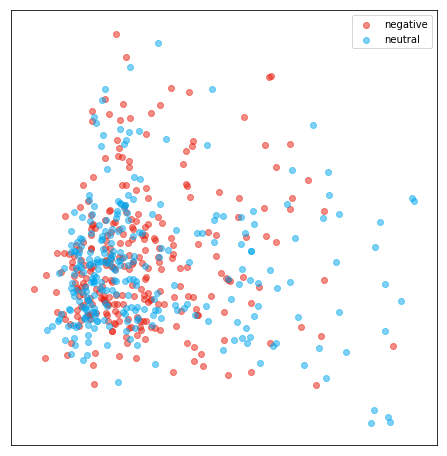

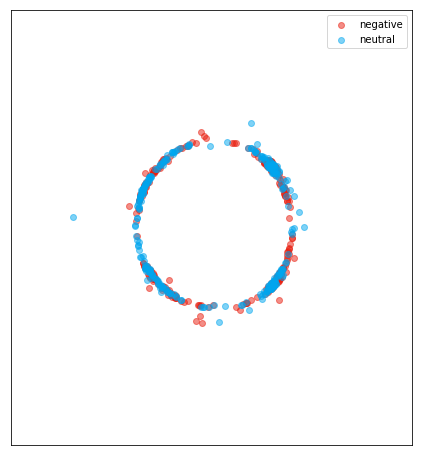

In [89]:
df = df_documents_athar                

%store df
%run unsupervised_classification_athar.ipynb

### Using same number neutral  than negative sentences

In [90]:
df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral_selection = df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']][:df_athar_negative.shape[0]]

df_documents_athar_50_50 = df_athar_negative.append(df_athar_neutral_selection)

################

"""
from modules.get_stemmed_sentences_and_list_words import *
import imp
imp.reload(modules.get_stemmed_sentences_and_list_words)
"""

sentences_neutral = df_athar_neutral_selection.Citation_Text
sentences_negative = df_athar_negative.Citation_Text
(documents_athar_50_50, list_all_words_athar_50_50, list_all_bigrams_athar_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_50_50, list_all_words_athar_50_50, 0.20)




documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 87.5
Most Informative Features
                     lin = True           neutra : negati =     15.8 : 1.0
                     cut = True           neutra : negati =     15.5 : 1.0
                   koehn = True           negati : neutra =     14.5 : 1.0
                 mckeown = True           neutra : negati =     14.1 : 1.0
                   brown = True           negati : neutra =     12.9 : 1.0
                  collin = True           negati : neutra =     11.3 : 1.0
                 similar = True           neutra : negati =     10.4 : 1.0
                    rapp = True           neutra : negati =      8.7 : 1.0
                    jing = True           neutra : negati =      8.4 : 1.0
                thesauru = True           neutra : negati =      8.1 : 1.0
                yarowski = True           negati : neutra =      7.8 : 1.0
                     ney = True           negati : n

Stored 'df' (DataFrame)


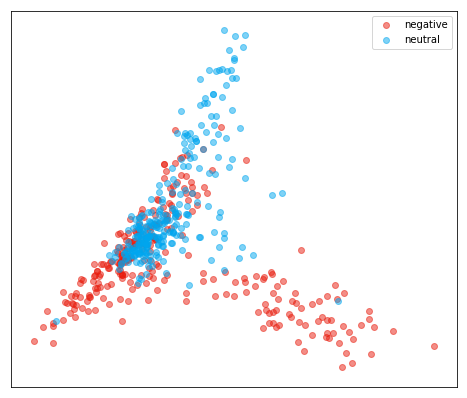

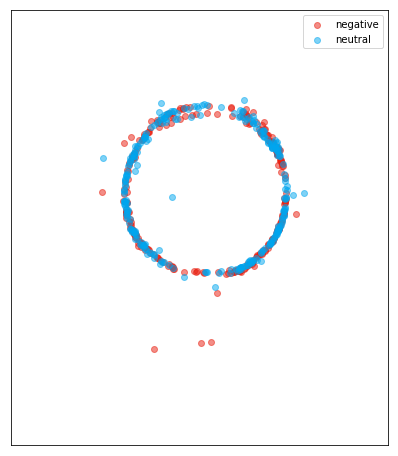

In [91]:
df = df_documents_athar_50_50                

%store df
%run unsupervised_classification_athar.ipynb

### Using balanced dataset

In [92]:
model_Naive_Bayes = train_Naive_Bayes(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, 0.20)



documents in test_set: 	 110
documents in training_set: 	 442

Classifier accuracy percent: 74.54545454545455
Most Informative Features
                   while = True            after : before =     12.4 : 1.0
              outperform = True            after : before =     11.8 : 1.0
                 bilingu = True           before : after  =      7.6 : 1.0
                although = True            after : before =      7.5 : 1.0
                    time = True            after : before =      7.1 : 1.0
                 problem = True            after : before =      7.1 : 1.0
                 address = True            after : before =      6.4 : 1.0
                  correl = True            after : before =      5.7 : 1.0
                   small = True            after : before =      5.7 : 1.0
                    show = True            after : before =      5.4 : 1.0
                advantag = True            after : before =      5.0 : 1.0
                    best = True        

Stored 'df' (DataFrame)


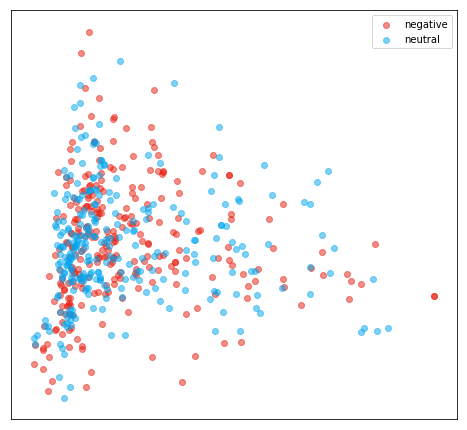

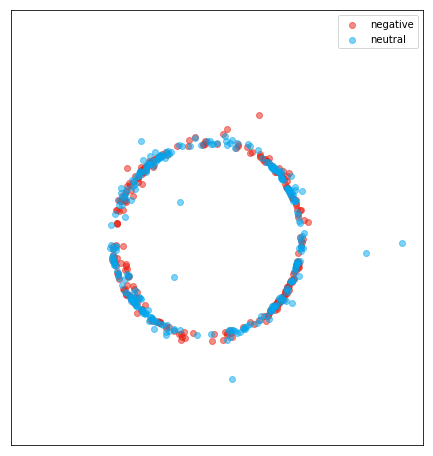

In [93]:
df = df_athar_documents_50_50_balanced                

%store df
%run unsupervised_classification_athar.ipynb




# Let's use the model to classify other sentences

In [94]:
import imp
import sys
sys.path.insert(0, "./modules")

from modules.get_stemmed_sentences_and_list_words import *



list_sentences = ["hidden framework ", "predict update",  "make present"] #athar_sentences_after[12]
list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

list_features_for_all_sentences = []
for sentence in list_sentences_tokenized_stemmed:
    features = find_features(sentence, word_features)
    list_features_for_all_sentences.append(features)
    
predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
print(predicted)


['before', 'before', 'after']


### Let's use the model with the sentences from retraction watch:

* Note that we are creating here the features using athar_list_all_words_50_50_balanced. However, to train another agorithm you must use all words from the docuements

# 1.1 -  All documents

#YOU CAN USE df_Articles_before_after_retraction instead of sentences = sentences_before + sentences_after
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing


#YOU CAN USE df_Articles_before_after_retraction instead of sentences = sentences_before + sentences_after
sentences_before_after = sentences_before.append(sentences_after)

#(documents_all, list_all_words, list_all_bigrams) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)
#df_documents_all = df_sentences_before.append(df_sentences_after) # I will used this in unsupervised models

list_sentences = sentences_before_after #sentences_after #athar_sentences_after[12]
list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

list_features_for_all_sentences = []
for sentence in list_sentences_tokenized_stemmed:
    features = find_features(sentence, word_features)
    list_features_for_all_sentences.append(features)
    
predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
print(predicted)



### 90 sentences_before(len(sentences_before)): 33 classified as non-criticising (predicted.count('before')); 57 critizising
### 32 sentences_after: 8 classified as non-criticising, 24 as critizising

### 122 sentences: 41 non-critizising; 81 critizising

In [182]:
# df_1sentence has the sentences citing for each section
# df1sentence_sentences_classification has the sentences citing together. I will use this.

df1sentence_sentences_classification_NBayes = df1sentence_sentences_classification

list_prediction_NBayes = []
for index, row, in df1sentence_sentences_classification_NBayes.iterrows():
    #print(row.sentences_citing)
    
    list_sentences = [row.sentences_citing] #sentences_after #athar_sentences_after[12]
    list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

    all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    list_features_for_all_sentences = []
    for sentence in list_sentences_tokenized_stemmed:
        features = find_features(sentence, word_features)
        list_features_for_all_sentences.append(features)

    predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
    list_prediction_NBayes = list_prediction_NBayes + predicted
    #print(index, '\t', predicted)

df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] = list_prediction_NBayes

df1sentence_sentences_classification_NBayes.head(2)


,DOI_cited,doi_article_citing,before_retraction,after_retraction,sentences_citing,Naive_Bayes_prediction
0,10.1186/s13033-017-0143-5,NaN,0,1,1) Although there has been meaningful debate...,after
1,10.1002/cbin.10291,10.1042/BSR20160174,1,0,To verify the activation of FOXO1 in our model...,after


In [183]:
before_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('before')
before_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('after')

after_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('before')
after_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('after')

print('Number of documents:', 
      '\n before_classified_as_non_critizising: \t', before_classified_as_non_critizising,
      '\n before_classified_as_critizising: \t', before_classified_as_critizising,
      '\n after_classified_as_non_critizising: \t', after_classified_as_non_critizising,
      '\n after_classified_as_critizising: \t', after_classified_as_critizising
      )

Number of documents: 
 before_classified_as_non_critizising: 	 33 
 before_classified_as_critizising: 	 57 
 after_classified_as_non_critizising: 	 8 
 after_classified_as_critizising: 	 24


In [193]:
sentences_NBayes_predicts_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'after',
        ['sentences_citing', 'before_retraction']])

sentences_NBayes_predicts_non_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'before',
        ['sentences_citing', 'before_retraction']])

In [194]:
sentences_NBayes_predicts_non_critizising

,sentences_citing,before_retraction
3,in a S961-induced insulin resistance mouse mod...,1
14,One quite promising study was published recent...,0
17,Other recent efforts have described the creati...,1
19,Others have shown that incongruence with taxon...,1
30,"In cancers, the dysregulation of miRNAs has be...",0
31,Nagel M.-D. Vayssade M. Akt and RhoA inhi...,1
32,"Also, several miRNAs have been found to be dir...",1
44,Some miRNAs are involved in tumorigenesis by a...,1
55,We also added a baseline condition in which ...,1
58,"Together, these experiments indicate that Ax21...",1


In [199]:
for index, row in sentences_NBayes_predicts_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    0    - before retraction:  0 -   %%%%%%%%%%%%% 

  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already

In [200]:
for index, row in sentences_NBayes_predicts_non_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    3    - before retraction:  1 -   %%%%%%%%%%%%% 

 in a S961-induced insulin resistance mouse model [  5  ].  in a S961-induced insulin resistance mouse model [
                 
                  5
                 
                 ]. in a S961-induced insulin resistance mouse model [  5  ].

 %%%%%%%%%%%%    14    - before retraction:  0 -   %%%%%%%%%%%%% 

 One quite promising study was published recently, stating that mutated TP53 caused poor prognosis to pancreatectomy through upregulation of PTRF (cavin-1) in patients with preoperative serum [  26  ], but the publication was retracted due to the use of wrong antibodies in the study [  27  ].   One quite promising study was published recently, stating that mutated TP53 caused poor prognosis to pancreatectomy through upregulation of PTRF (cavin-1) in patients with preoperative serum [  26  ], but the publication was retracted due to the use of wrong antibodies in the study [  27  ].

 %%%%%%%%%%%%    17    - befor

# Let's filter the sentences analyse:

Critizising: After retraction and classified as critizising by the Naive Bayes model

    
Non-critizising: Before retraction and classified as neutral by the Naive Bayes model

In [205]:
mask_before = (df1sentence_sentences_classification_NBayes.before_retraction == 1) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'before')

mask_after = (df1sentence_sentences_classification_NBayes.before_retraction == 0) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'after')
        
sentences_before_non_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_before].sentences_citing
sentences_after_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_after].sentences_citing


In [207]:
sentences_before_non_critizising_filtered.shape

(33,)

In [208]:
sentences_after_critizising_filtered.shape

(24,)

In [ ]:
for sentence in sentences_before_non_critizising_filtered:
    print(sentence)